# Why scaling the data improves the performance of some models?

## Load data

In [13]:
import pandas as pd

path = '../../../data/default_credit_card/output/simplified_features.csv'
df = pd.read_csv(path)
df

,Gender,Age,Married,YearsEmployed,Income,Approved
0,1,30,1,1.25,0,1
1,0,58,1,3.04,560,1
...,...,...,...,...,...,...
688,1,17,1,0.04,750,0
689,1,35,1,8.29,0,0


## Feature selection

In [25]:
target = 'Approved'

y = df[target]
X = df.drop(columns=target)

## Train test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Modelling with Support Vector Machine

### Raw data

SVC()

{'test': 0.6521739130434783, 'train': 0.6790890269151139}

### Scaled data

SVC()

{'test': 0.6521739130434783, 'train': 0.6790890269151139}

## Comparison

,Original,Scaled
test,0.623188,0.652174
train,0.660455,0.679089


Since the Support Vector Machine (SVM) algorithm calculates distances...

<figure>
<img src="src/SVM_margin.png" alt="SVM margin" style="width: 400px;"/>
<figcaption><a href="https://commons.wikimedia.org/w/index.php?curid=73710028">By Larhmam - Own work, CC BY-SA 4.0</a></figcaption>
</figure>

It will give more importance to the features that have a higher scale:

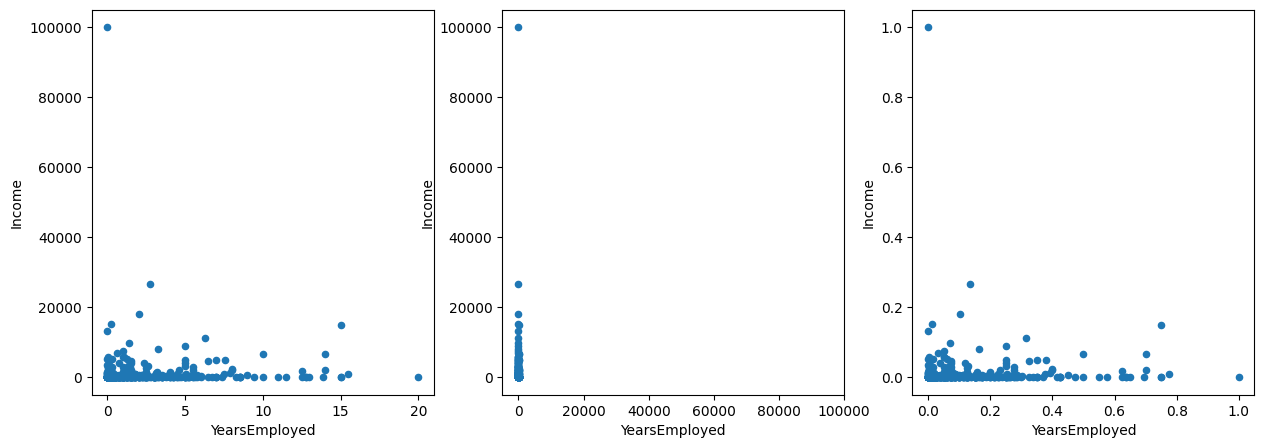

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

X_train.plot.scatter(x='YearsEmployed', y='Income', ax=ax[0])
X_train.plot.scatter(x='YearsEmployed', y='Income', ax=ax[1])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.plot.scatter(x='YearsEmployed', y='Income', ax=ax[2])

max_value = X_train[['YearsEmployed', 'Income']].max().max()
ax[1].set_xlim(-max_value*0.05, max_value)

plt.show()